<a href="https://colab.research.google.com/github/step-code01/Engineering_Design_Project_Simulator/blob/main/Engineering_design_project_v3_alterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def cantt_static_deflection(P, L, E, I):
    return (P*L**3)/(3*E*I)

def DMF_from_height(h, delta_s):
    return 1+np.sqrt(1+(2*h)/delta_s)

def impact_velocity(h):
    return np.sqrt(2*9.81*h)

def dynamic_stress(static_sigma, DMF):
    return static_sigma*DMF

In [ ]:
def I_rect(b, d):
    return (b*d**3)/12

def I_circ(d):
    return (np.pi*d**4)/64

def bending_stress(P, L, b, d, type="rect"):
    if type == "rect":
        I=I_rect(b, d)
    else:
        I=I_circ(d)

    y=d/2
    M=P*L/4
    sigma=M*y/I
    return sigma

def failure_load(sigma_fail, L, b, d, type="rect"):
    if type=="rect":
        I=I_rect(b, d)
    else:
        I=I_circ(d)

    y=d/2
    P=(sigma_fail*I*4)/(y*L)
    return P


In [ ]:
'''import matplotlib.pyplot as plt

def plot_trajectory(xs, ys, label="Trajectory"):
    plt.plot(xs, ys, label=label)
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    plt.show()

def compare_trajectories(data):
    for xs, ys, name in data:
        plt.plot(xs, ys, label=name)

    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    plt.show()'''
    #basic graph plot k liye testing v1

'import matplotlib.pyplot as plt\n\ndef plot_trajectory(xs, ys, label="Trajectory"):\n    plt.plot(xs, ys, label=label)\n    plt.xlabel("Distance (m)")\n    plt.ylabel("Height (m)")\n    plt.legend()\n    plt.minorticks_on()\n    plt.grid(which=\'major\', linestyle=\'-\', linewidth=\'0.8\', color=\'gray\')\n    plt.grid(which=\'minor\', linestyle=\':\', linewidth=\'0.5\', color=\'lightgray\')\n    plt.show()\n\ndef compare_trajectories(data):\n    for xs, ys, name in data:\n        plt.plot(xs, ys, label=name)\n\n    plt.xlabel("Distance (m)")\n    plt.ylabel("Height (m)")\n    plt.legend()\n    plt.minorticks_on()\n    plt.grid(which=\'major\', linestyle=\'-\', linewidth=\'0.8\', color=\'gray\')\n    plt.grid(which=\'minor\', linestyle=\':\', linewidth=\'0.5\', color=\'lightgray\')\n    plt.show()'

In [ ]:
g = 9.81

def simulate_no_drag(v0, angle_deg, dt=0.01):
    theta=np.radians(angle_deg)
    vx=v0*np.cos(theta)
    vy=v0*np.sin(theta)

    x=0;y=0
    xs,ys=[],[]

    while y>=0:
        xs.append(x)
        ys.append(y)

        # update kr rha
        x+=vx*dt
        y+=vy*dt-0.5*g*dt**2
        vy-=g*dt

    return np.array(xs), np.array(ys)


def simulate_drag(v0, angle_deg, m, Cd, rho, D, dt=0.01):
    A=np.pi*(D/2)**2
    k=0.5*rho*Cd*A/m

    theta=np.radians(angle_deg)
    vx=v0*np.cos(theta)
    vy=v0*np.sin(theta)

    x=0;y=0
    xs,ys=[],[]

    while y>=0:
        xs.append(x); ys.append(y)

        v = np.sqrt(vx**2 + vy**2)

        #drag, -ve accn
        ax=-k*v*vx
        ay=-g-k*v*vy

        x+=vx*dt
        y+=vy*dt

        vx+=ax*dt
        vy+=ay*dt

    return np.array(xs), np.array(ys)

def plot_drag_vs_no_drag(v0, angle, m, Cd, rho, D):
    xs_n, ys_n = simulate_no_drag(v0, angle)
    xs_d, ys_d = simulate_drag(v0, angle, m, Cd, rho, D)

    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(xs_n, ys_n, label="No Drag", linewidth=2)
    ax.plot(xs_d, ys_d, label="With Drag", linewidth=2)

    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title("Drag vs No Drag")
    ax.grid(True)
    ax.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    return fig

In [ ]:
def multi_angle_plot(v0, angle_start, angle_end, angle_step, m, Cd, rho, D):

    angles = np.arange(angle_start, angle_end+0.1, angle_step)
    fig, ax = plt.subplots(figsize=(8,5))

    best_range = 0
    best_angle = None
    best_xs = None
    best_ys = None

    for angle in angles:
        xs, ys = simulate_drag(v0, angle, m, Cd, rho, D)
        R = xs[-1]

        #best ko store krra
        if R > best_range:
            best_range = R
            best_angle = angle
            best_xs = xs
            best_ys = ys

        ax.plot(xs, ys, linewidth=1.5, label=f"{angle}°")

    #best curve ko highlight krring
    ax.plot(best_xs, best_ys, linewidth=3, color="red", label=f"Best: {best_angle}°")

    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title("Multi-Angle Trajectories (Drag Only)")
    ax.grid(True)
    ax.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

    return fig, float(best_range), float(best_angle)

def multi_velocity_plot(v_start, v_end, v_step, angle, m, Cd, rho, D):

    velocities = np.arange(v_start, v_end+0.01, v_step)
    fig, ax = plt.subplots(figsize=(8,5))

    best_range = 0
    best_v = None
    best_xs = None
    best_ys = None

    for v0 in velocities:
        xs, ys = simulate_drag(v0, angle, m, Cd, rho, D)
        R = xs[-1]

        if R > best_range:
            best_range = R
            best_v = v0
            best_xs = xs
            best_ys = ys

        ax.plot(xs, ys, linewidth=1.5, label=f"{v0} m/s")

    ax.plot(best_xs, best_ys, linewidth=3, color="red", label=f"Best: {best_v} m/s")

    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title("Multi-Velocity Trajectories (Drag Only)")
    ax.grid(True)
    ax.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

    return fig, float(best_range), float(best_v)


In [ ]:
'''def graph_load_vs_span(sigma_fail, b, d):
    L_vals_mm = np.linspace(100, 700, 200)
    L_vals_m = L_vals_mm / 1000

    I = (b*d**3)/12
    y = d/2

    P_vals_N = (4 * sigma_fail * I) / (y * L_vals_m)
    P_vals_kg = P_vals_N / 9.81             #N to kg v.imp

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(L_vals_mm, P_vals_kg, linewidth=2)

    ax.set_xlabel("Span L (mm)")
    ax.set_ylabel("Failure Load (kg)")
    ax.set_title("Failure Load vs Span (100–700 mm)")
    ax.grid(True)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8')
    plt.grid(which='minor', linestyle=':', linewidth='0.5')

    return fig

def graph_load_vs_square_size(sigma_fail, L):
    sizes_mm = np.linspace(4, 10, 200)  # 4–10 mm
    sizes_m = sizes_mm / 1000

    P_vals_N = (2 * sigma_fail * sizes_m**3) / (3 * L)
    P_vals_kg = P_vals_N / 9.81

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(sizes_mm, P_vals_kg, linewidth=2)

    ax.set_xlabel("Square Cross-Section (mm)")
    ax.set_ylabel("Failure Load (kg)")
    ax.set_title("Failure Load vs Square Section Size (4–10 mm)")
    ax.grid(True)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8')
    plt.grid(which='minor', linestyle=':', linewidth='0.5')

    return fig'''#sb kuch mm me hoga crucial mistake, pahle metre me glt kar diya unit cancel check karke dekhi

'def graph_load_vs_span(sigma_fail, b, d):\n    L_vals_mm = np.linspace(100, 700, 200)\n    L_vals_m = L_vals_mm / 1000\n\n    I = (b*d**3)/12\n    y = d/2\n\n    P_vals_N = (4 * sigma_fail * I) / (y * L_vals_m)\n    P_vals_kg = P_vals_N / 9.81             #N to kg v.imp\n\n    fig, ax = plt.subplots(figsize=(7,5))\n    ax.plot(L_vals_mm, P_vals_kg, linewidth=2)\n\n    ax.set_xlabel("Span L (mm)")\n    ax.set_ylabel("Failure Load (kg)")\n    ax.set_title("Failure Load vs Span (100–700 mm)")\n    ax.grid(True)\n    plt.minorticks_on()\n    plt.grid(which=\'major\', linestyle=\'-\', linewidth=\'0.8\')\n    plt.grid(which=\'minor\', linestyle=\':\', linewidth=\'0.5\')\n\n    return fig\n\ndef graph_load_vs_square_size(sigma_fail, L):\n    sizes_mm = np.linspace(4, 10, 200)  # 4–10 mm\n    sizes_m = sizes_mm / 1000\n\n    P_vals_N = (2 * sigma_fail * sizes_m**3) / (3 * L)\n    P_vals_kg = P_vals_N / 9.81\n\n    fig, ax = plt.subplots(figsize=(7,5))\n    ax.plot(sizes_mm, P_vals_kg, linewid

In [ ]:
#v.imp, b,d,L mm me hai and sigma in MPa - factor cancels out
def graph_load_vs_span(sigma_fail_MPa, b_mm, d_mm):
    L_vals_mm = np.linspace(100, 700, 200)

    y = d_mm/2
    I = (b_mm*(d_mm**3))/12

    P_vals_N = (4*sigma_fail_MPa*I)/(y*L_vals_mm)
    P_vals_kg = P_vals_N / 9.81

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(L_vals_mm, P_vals_kg,linewidth=2,color='red')
    ax.set_xlabel("Span L (mm)")
    ax.set_ylabel("Failure Load (kg)")
    ax.set_title("Failure Load vs Span (100–700 mm)")
    ax.grid(True)
    ax.minorticks_on()
    ax.grid(which='major', linewidth='0.8')
    ax.grid(which='minor', linewidth='0.5')
    return fig

def graph_load_vs_square_size(sigma_fail_MPa, L_mm):
    sizes_mm = np.linspace(4, 10, 200)

    P_vals_N = (2*sigma_fail_MPa*sizes_mm**3)/(3*L_mm)
    P_vals_kg = P_vals_N/9.81

    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(sizes_mm, P_vals_kg)

    ax.set_xlabel("Square Cross-Section (mm)")
    ax.set_ylabel("Failure Load (kg)")
    ax.set_title("Failure Load vs Square Section Size (4–10 mm)")
    ax.grid(True)
    ax.minorticks_on()
    ax.grid(which='major', linewidth='0.8')
    ax.grid(which='minor', linewidth='0.5')
    return fig

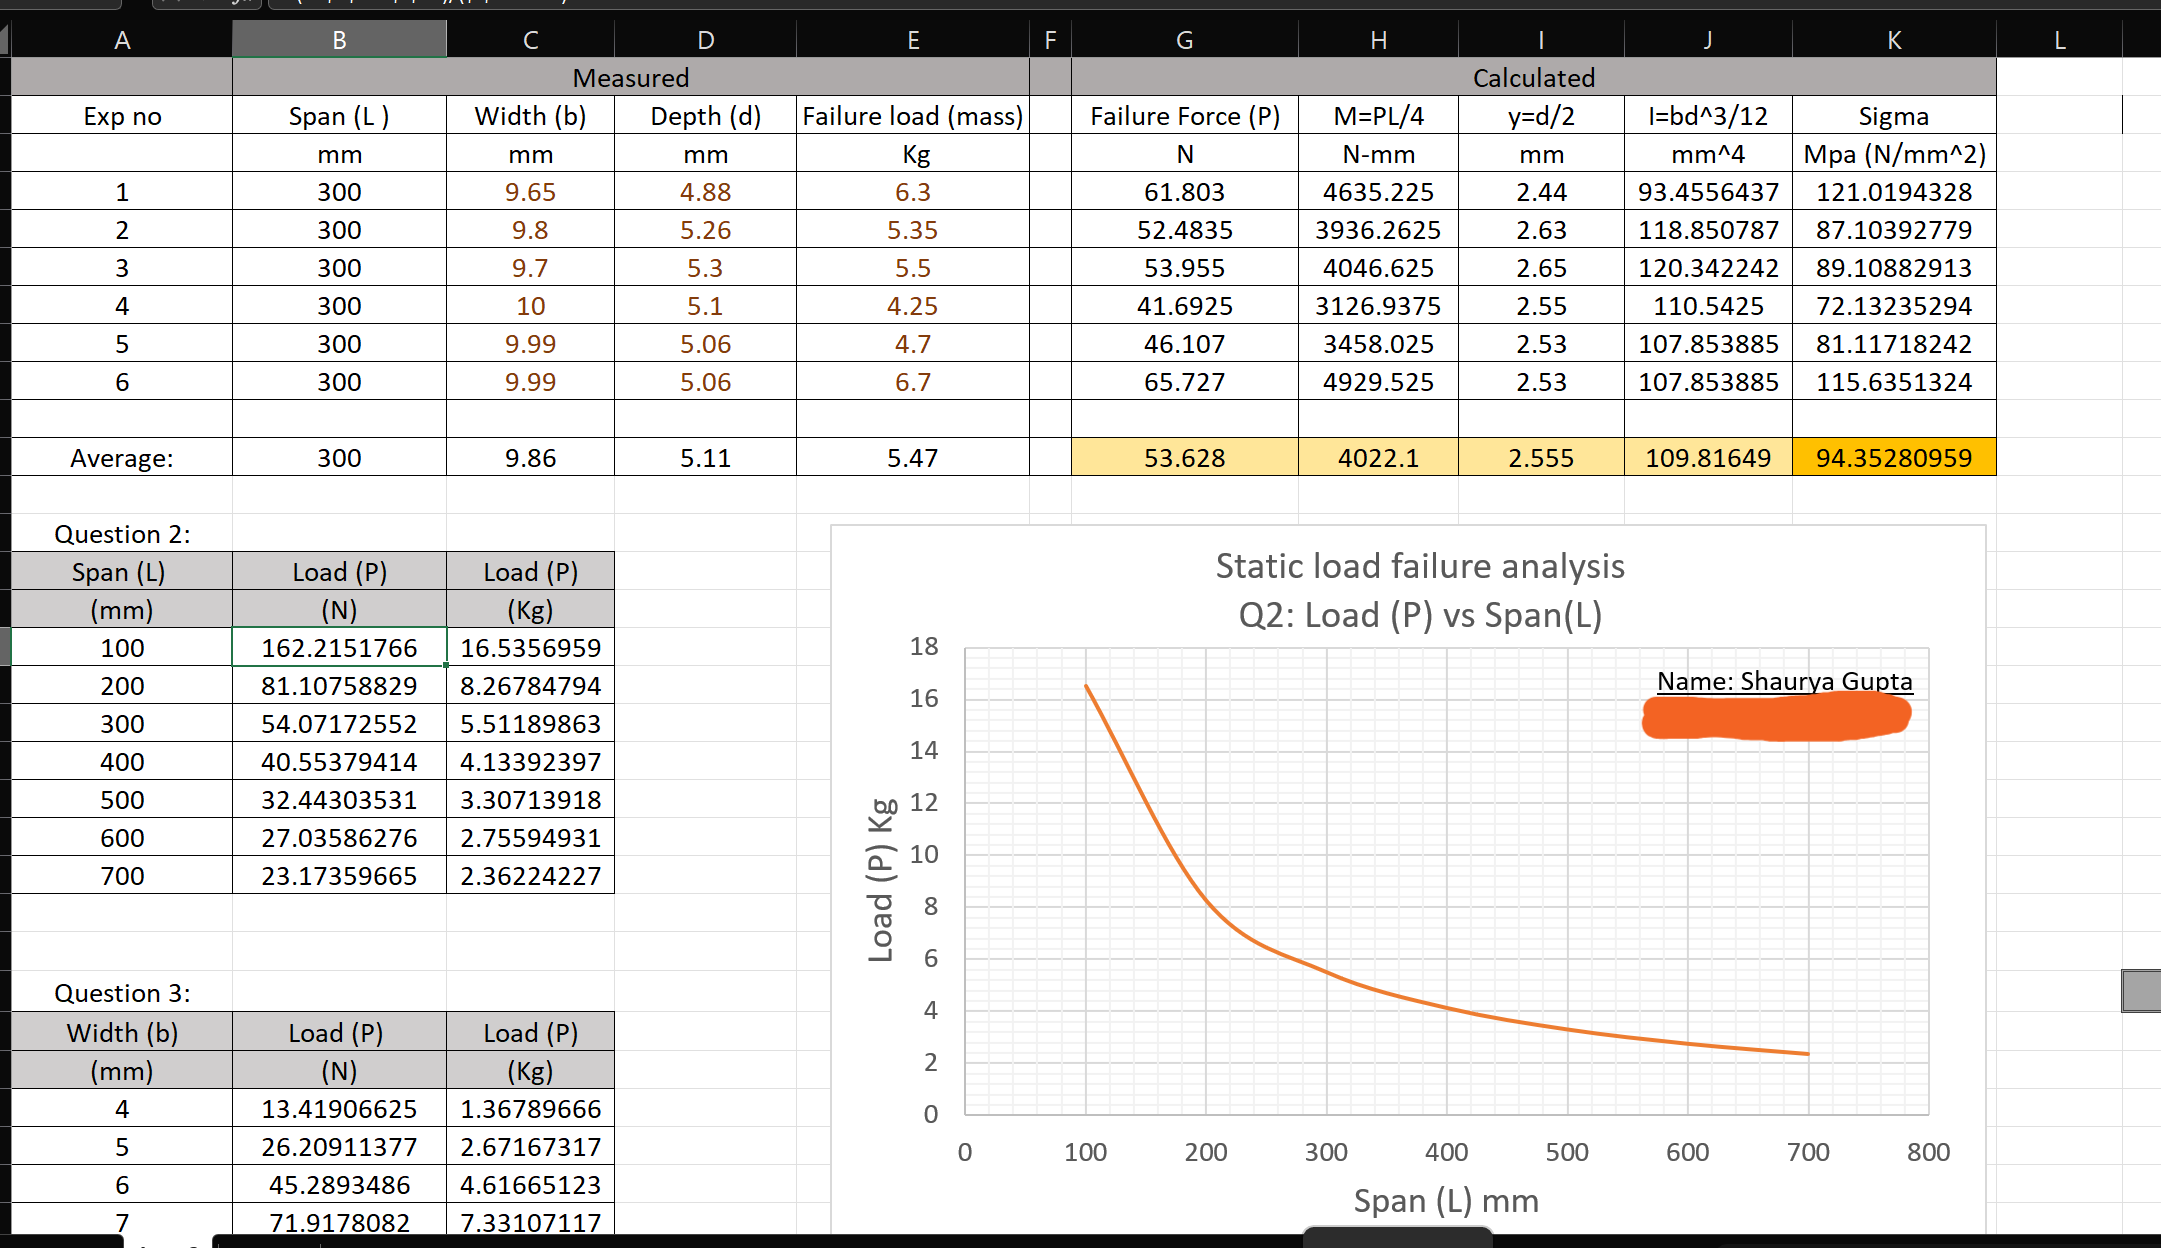

P = 4sigmaI/yL <br>
=> MPa*(mm^4)/mm*mm <br>
=> MPa*mm^2<br>
=> 1 Pa = 1 N/m^2 <br>
=> N/mm^2 x 10^-6 x 10^6 * mm^2 (mega prefix 10^6 v.imp) = N <br>
thik aara ok

In [ ]:
'''def main(): testing phase, basic graphs output

    print("=== Projectile Simulation ===")
    xs, ys=simulate_no_drag(15, 45)
    plot_trajectory(xs,ys,label="No Drag")

    xs_d, ys_d = simulate_drag(
        v0=15, angle_deg=45, m=0.05, Cd=0.4, rho=1.2, D=0.045
    )

    compare_trajectories([
        (xs, ys, "No Drag"),
        (xs_d, ys_d, "With Drag")
    ])

    print("\n=== Static Beam Failure ===")
    sigma = bending_stress(P=60, L=0.3, b=0.01, d=0.005)
    print("Bending stress =", sigma, "MPa")

    print("\n=== Dynamic Impact ===")
    h = 0.2
    v = impact_velocity(h)
    print("Impact velocity =", v, "m/s")

    delta_s = 0.0005
    dmf = DMF_from_height(h, delta_s)
    print("DMF =", dmf)

    sigma_dyn = dynamic_stress(sigma, dmf)
    print("Dynamic stress =", sigma_dyn, "MPa")

if __name__ == "__main__":
    main()'''


'def main(): testing phase, basic graphs output\n\n    print("=== Projectile Simulation ===")\n    xs, ys=simulate_no_drag(15, 45)\n    plot_trajectory(xs,ys,label="No Drag")\n\n    xs_d, ys_d = simulate_drag(\n        v0=15, angle_deg=45, m=0.05, Cd=0.4, rho=1.2, D=0.045\n    )\n\n    compare_trajectories([\n        (xs, ys, "No Drag"),\n        (xs_d, ys_d, "With Drag")\n    ])\n\n    print("\n=== Static Beam Failure ===")\n    sigma = bending_stress(P=60, L=0.3, b=0.01, d=0.005)\n    print("Bending stress =", sigma, "MPa")\n\n    print("\n=== Dynamic Impact ===")\n    h = 0.2\n    v = impact_velocity(h)\n    print("Impact velocity =", v, "m/s")\n\n    delta_s = 0.0005\n    dmf = DMF_from_height(h, delta_s)\n    print("DMF =", dmf)\n\n    sigma_dyn = dynamic_stress(sigma, dmf)\n    print("Dynamic stress =", sigma_dyn, "MPa")\n\nif __name__ == "__main__":\n    main()'

Interactive GUI based graph try

In [ ]:
!pip install gradio

In [ ]:
#drag vs no drag gradio only testing
'''import gradio as gr

def run_simulation(v0, angle, mass, Cd, rho, diameter, mode):

    if mode == "No Drag":
        xs, ys = simulate_no_drag(v0, angle)
    else:
        xs, ys = simulate_drag(v0, angle, mass, Cd, rho, diameter)

    fig, ax = plt.subplots()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')

    ax.plot(xs, ys)
    ax.set_xlabel("Horizontal Distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title(f"Trajectory - {mode}")
    ax.grid(True)

    return fig, float(xs[-1]) #plot ko img me krne k liye

with gr.Blocks() as gui:
    gr.Markdown("Mangonel Dynamics Simulator")
    gr.Markdown("Interactive tool for **projectile motion with/without drag**.")

    with gr.Row():
        v0 = gr.Slider(5, 60, value=20, label="Launch Velocity (m/s)")
        angle = gr.Slider(10, 80, value=45, label="Launch Angle (°)")

    mode = gr.Radio(["No Drag", "With Drag"], value="No Drag", label="Simulation Mode")

    gr.Markdown("### Drag Parameters (only used when drag is enabled)")
    with gr.Row():
        mass = gr.Slider(0.02, 0.2, value=0.05, label="Mass (kg)")
        Cd = gr.Slider(0.1, 1.0, value=0.4, label="Drag Coefficient Cd")
        rho = gr.Slider(0.5, 2.0, value=1.2, label="Air Density (kg/m³)")
        diameter = gr.Slider(0.02, 0.1, value=0.045, label="Diameter (m)")

    run_button = gr.Button("Run Simulation")

    output_plot = gr.Plot()
    output_range = gr.Number(label="Maximum Horizontal Range (m)")

    run_button.click(
        fn=run_simulation,
        inputs=[v0, angle, mass, Cd, rho, diameter, mode],
        outputs=[output_plot, output_range]
    )

gui.launch()''' #v2 gradio drag vs no drag gui only

'import gradio as gr\n\ndef run_simulation(v0, angle, mass, Cd, rho, diameter, mode):\n\n    if mode == "No Drag":\n        xs, ys = simulate_no_drag(v0, angle)\n    else:\n        xs, ys = simulate_drag(v0, angle, mass, Cd, rho, diameter)\n\n    fig, ax = plt.subplots()\n    plt.minorticks_on()\n    plt.grid(which=\'major\', linestyle=\'-\', linewidth=\'0.8\', color=\'gray\')\n    plt.grid(which=\'minor\', linestyle=\':\', linewidth=\'0.5\', color=\'lightgray\')\n\n    ax.plot(xs, ys)\n    ax.set_xlabel("Horizontal Distance (m)")\n    ax.set_ylabel("Height (m)")\n    ax.set_title(f"Trajectory - {mode}")\n    ax.grid(True)\n\n    return fig, float(xs[-1]) #plot ko img me krne k liye\n\nwith gr.Blocks() as gui:\n    gr.Markdown("Mangonel Dynamics Simulator")\n    gr.Markdown("Interactive tool for **projectile motion with/without drag**.")\n\n    with gr.Row():\n        v0 = gr.Slider(5, 60, value=20, label="Launch Velocity (m/s)")\n        angle = gr.Slider(10, 80, value=45, label="Laun

checklist to add:
-voice integration<br>
-poora gradio integration simulator saare<br>
-what's the best optimal range finder?<br>
-changing diff types of beams karne par kya effects?<br>
-somehow update graphs in realtime gui -matplotlib gui interactive wale?

Testing phase whole gradio gui very simple right now, graph is just a img

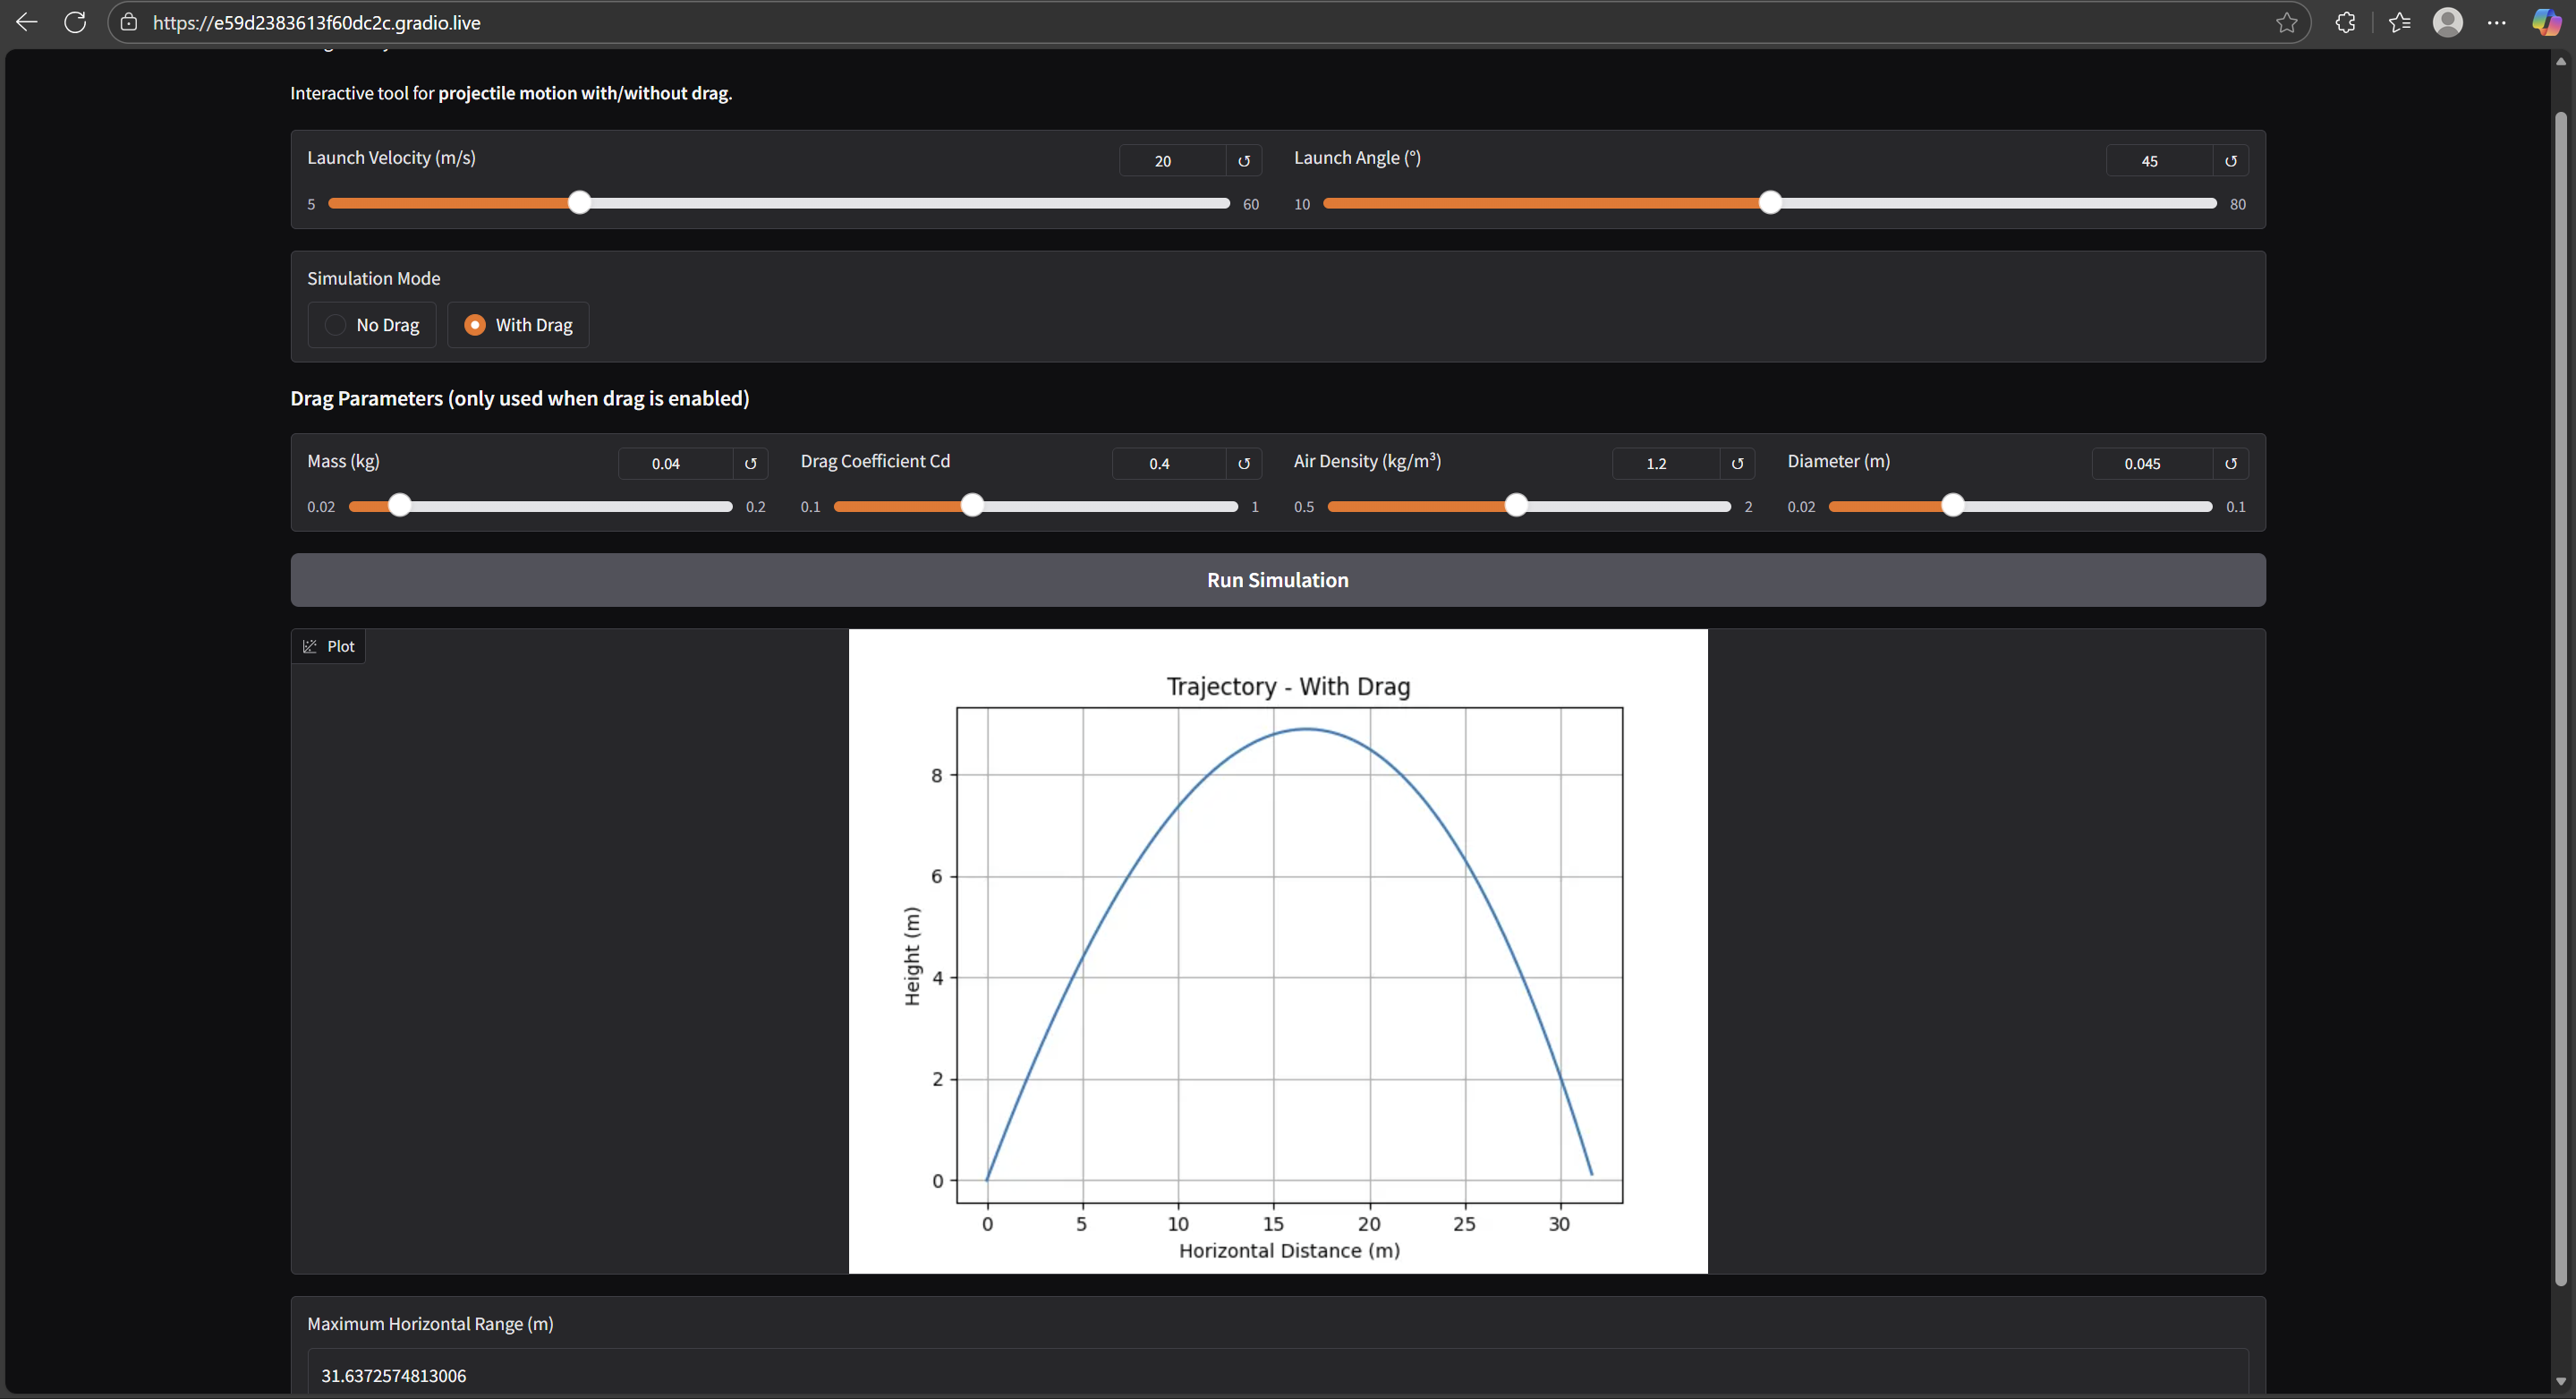

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt

def run_projectile(v0, angle, m, Cd, rho, diameter, mode):

    fig, ax = plt.subplots(figsize=(7,5))

    if mode == "No Drag":
        xs, ys = simulate_no_drag(v0, angle)
        ax.plot(xs, ys, label="No Drag", color="blue", linewidth=2)

        result_range = xs[-1]

    elif mode == "With Drag":
        xs, ys = simulate_drag(v0, angle, m, Cd, rho, diameter)
        ax.plot(xs, ys, label="With Drag", color="red", linewidth=2)

        result_range = xs[-1]

    elif mode == "Comparison":
        xs_n, ys_n = simulate_no_drag(v0, angle)
        xs_d, ys_d = simulate_drag(v0, angle, m, Cd, rho, diameter)

        ax.plot(xs_n, ys_n, label="No Drag", color="blue", linewidth=2)
        ax.plot(xs_d, ys_d, label="With Drag", color="red", linewidth=2)

        # output both ranges (abhi k liye no-drag range returning)
        result_range = max(xs_n[-1], xs_d[-1])

    ax.set_xlabel("Horizontal distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_title(f"Trajectory — {mode}")
    ax.legend()
    ax.grid(True)
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    return fig, result_range

def run_static_beam(P, L, b, d, shape, sigma_fail):
    sigma = bending_stress(P, L, b, d, shape)
    P_fail = failure_load(sigma_fail, L, b, d, shape)
    return sigma, P_fail


def run_dynamic_beam(P, L, E, b, d, shape, h):
    I = I_rect(b, d) if shape == "rect" else I_circ(d)
    delta_s = cantt_static_deflection(P, L, E, I)
    v = impact_velocity(h)
    dmf = DMF_from_height(h, delta_s)
    sigma_static = bending_stress(P, L, b, d, shape)
    sigma_dyn = dynamic_stress(sigma_static, dmf)
    return float(v), float(delta_s), float(dmf), float(sigma_dyn)


with gr.Blocks() as gui:
    gr.Markdown("# Mangonel Engineering Simulator")
    gr.Markdown("A complete interactive tool for **projectile motion and structural analysis**")

    with gr.Tabs():
        #1st pg
        with gr.Tab("Projectile Simulator"):
            gr.Markdown("### Projectile (Drag + No Drag)")

            with gr.Row():
                v0 = gr.Slider(5, 60, value=20, label="Velocity (m/s)")
                angle = gr.Slider(10, 80, value=45, label="Angle (°)")

            mode = gr.Radio(["No Drag", "With Drag","Comparison"], label="Mode", value="No Drag")

            gr.Markdown("### Drag Parameters (only used when drag is enabled)")
            with gr.Row():
                m = gr.Slider(0.02, 0.2, value=0.05, label="Mass (kg)")
                Cd = gr.Slider(0.1, 1.0, value=0.4, label="Drag Coefficient")
                rho = gr.Slider(0.5, 2.0, value=1.2, label="Air Density")
                diameter = gr.Slider(0.02, 0.1, value=0.045, label="Diameter (m)")

            run_button = gr.Button("Simulate")
            output_plot = gr.Plot()
            output_range = gr.Number(label="Maximum Range (m)")

            run_button.click(
                fn=run_projectile,
                inputs=[v0, angle, m, Cd, rho, diameter, mode],
                outputs=[output_plot, output_range]
            )

        #2nd pg
        with gr.Tab("Multi-Plot & Optimum Finder"):
            gr.Markdown("### Explore Trajectories Across Multiple Angles / Velocities (Drag Only)")
            gr.Markdown("Find **optimal realistic range** automatically.")

            gr.Markdown("## Multi-Angle Plot (Drag Only)")
            with gr.Row():
                angle_start = gr.Number(value=20, label="Start Angle (°)")
                angle_end = gr.Number(value=70, label="End Angle (°)")
                angle_step = gr.Number(value=5, label="Angle Step (°)")

            with gr.Row():
                v0_A = gr.Number(value=20, label="Launch Velocity (m/s)")
                m_A = gr.Number(value=0.05, label="Mass (kg)")
                Cd_A = gr.Number(value=0.4, label="Cd")
                rho_A = gr.Number(value=1.2, label="Air Density")
                D_A = gr.Number(value=0.045, label="Diameter (m)")

            btn_A = gr.Button("Plot Multi-Angle")
            out_plot_A = gr.Plot()
            out_best_range_A = gr.Number(label="Best Range (m)")
            out_best_angle_A = gr.Number(label="Best Angle (°)")

            btn_A.click(
                multi_angle_plot,
                inputs=[v0_A, angle_start, angle_end, angle_step, m_A, Cd_A, rho_A, D_A],
                outputs=[out_plot_A, out_best_range_A, out_best_angle_A]
            )

            gr.Markdown("---")
            gr.Markdown("## Multi-Velocity Plot (Drag Only)")
            with gr.Row():
                v_start = gr.Number(value=10, label="Start Velocity (m/s)")
                v_end = gr.Number(value=40, label="End Velocity (m/s)")
                v_step = gr.Number(value=5, label="Velocity Step (m/s)")

            with gr.Row():
                angle_V = gr.Number(value=45, label="Launch Angle (°)")
                m_V = gr.Number(value=0.05, label="Mass (kg)")
                Cd_V = gr.Number(value=0.4, label="Cd")
                rho_V = gr.Number(value=1.2, label="Air Density")
                D_V = gr.Number(value=0.045, label="Diameter (m)")

            btn_V = gr.Button("Plot Multi-Velocity")
            out_plot_V = gr.Plot()
            out_best_range_V = gr.Number(label="Best Range (m)")
            out_best_v_V = gr.Number(label="Best Velocity (m/s)")

            btn_V.click(
                multi_velocity_plot,
                inputs=[v_start, v_end, v_step, angle_V, m_V, Cd_V, rho_V, D_V],
                outputs=[out_plot_V, out_best_range_V, out_best_v_V]
            )

        #3rd pg
        with gr.Tab("Static Beam Failure"):
            gr.Markdown("### Static Beam Stress & Failure Load (MM-based)")

            P = gr.Number(value=50, label="Applied Load (N)")
            L_mm = gr.Number(value=300, label="Span L (mm)")
            b_mm = gr.Number(value=10, label="Width b (mm)")
            d_mm = gr.Number(value=5, label="Depth/diameter d (mm)")
            sigma_fail_MPa = gr.Number(value=50, label="Material Failure Stress σ_fail (MPa)")
            shape = gr.Radio(["rect", "circ"], value="rect", label="Cross Section")

            out_static_sigma = gr.Number(label="Static Stress σ (MPa)")
            out_fail_load = gr.Number(label="Predicted Failure Load (N)")

            gr.Button("Calculate Static Failure").click(
                fn=run_static_beam,
                inputs=[P, L_mm, b_mm, d_mm, shape, sigma_fail_MPa],
                outputs=[out_static_sigma, out_fail_load]
            )

            gr.Markdown("---")
            gr.Markdown("## Engineering Graphs for Analysis (Assignment 3)")

            gr.Markdown("### 1. Failure Load vs Span (100–700 mm)")
            btn_span_graph = gr.Button("Plot Load vs Span")
            out_span_graph = gr.Plot()

            btn_span_graph.click(
                fn=graph_load_vs_span,
                inputs=[sigma_fail_MPa, b_mm, d_mm],
                outputs=out_span_graph
            )

            gr.Markdown("---")

            gr.Markdown("### 2. Failure Load vs Square Cross-section (4–10 mm)")
            btn_size_graph = gr.Button("Plot Load vs Square Size")
            out_size_graph = gr.Plot()

            btn_size_graph.click(
                fn=graph_load_vs_square_size,
                inputs=[sigma_fail_MPa, L_mm],
                outputs=out_size_graph
            )

        #4th pg
        with gr.Tab("Dynamic Impact (DMF)"):
            gr.Markdown("### Impact Loading & Dynamic Magnification Factor (DMF)")

            P2 = gr.Number(value=50, label="Load P (N)")
            L2 = gr.Number(value=0.3, label="Span L (m)")
            E = gr.Number(value=12e9, label="Young's Modulus E (Pa)")
            b2 = gr.Number(value=0.01, label="Width b (m)")
            d2 = gr.Number(value=0.005, label="Depth/diameter d (m)")
            h = gr.Number(value=0.2, label="Drop Height (m)")
            shape2 = gr.Radio(["rect", "circ"], value="rect", label="Cross Section")

            out_v = gr.Number(label="Impact Velocity (m/s)")
            out_delta_s = gr.Number(label="Static Deflection δs (m)")
            out_dmf = gr.Number(label="DMF")
            out_sigma_dyn = gr.Number(label="Dynamic Stress σdyn (MPa)")

            gr.Button("Calculate").click(
                fn=run_dynamic_beam,
                inputs=[P2, L2, E, b2, d2, shape2, h],
                outputs=[out_v, out_delta_s, out_dmf, out_sigma_dyn]
            )


gui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a48addf4defe2e17d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


things to add?<br>
-export to excel directly<br>
-optimiser max range <br>
-optimiser for best arm dia <br>
-Save graphs as PNG? maybe?<br>
-must need: combined graphs show-er
-keeping axes constant so that i can see the change